In [1]:
from fonctions import *

In [4]:
# récupération des articles et des tags

dic = lire_json("articlesTags_Stanford.json")

new_dic = reorganiser_POS(dic)

# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

# Vectorisation des documents et création du model

ngram_min, ngram_max = 4, 4

X, V = creer_X(liste_tags, ngram_min, ngram_max)

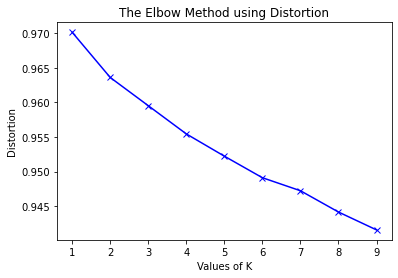

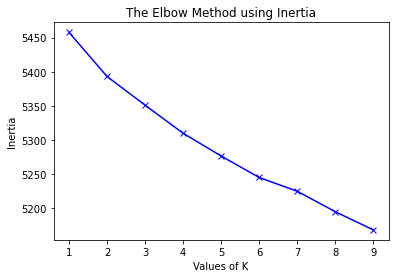

In [5]:
K = range(1, 10)

dis, inert = elbow(X, K)

afficher_elbow(dis, inert, K)

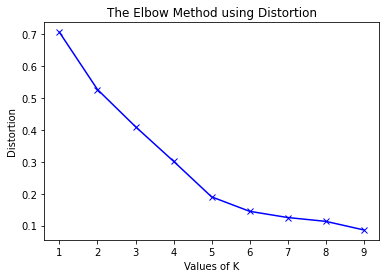

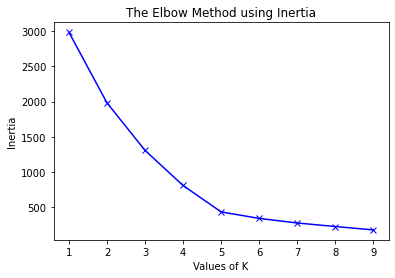

In [3]:
# calcul pour les entités nommées

dic_EN = lire_json('entites_nommees.json')

chemins_articles = [x for x in dic_EN.keys()]
liste_tagEN = [x[1] for x in dic_EN.values()]
liste_titres = [x[2] for x in dic_EN.values()]

liste_journaux = get_liste_journaux(chemins_articles)

X, V = creer_X(liste_tagEN, 1, 1)

K = range(1, 10)

dis, inert = elbow(X, K)

afficher_elbow(dis, inert, K)